In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
#import ggplot as ggplot
from plotnine.data import economics


In [3]:
# Raw data file
file_to_load = "Resources/profiles_revised_Mar_29.csv"

# Read purchasing file and store into pandas data frame
df= pd.read_csv(file_to_load)
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn't matter,no,"english, french, c++",available
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn't want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df = df.fillna('Declined to Answer')
df = df[df.age != 109]
df = df[df.age != 111]
df = df.replace('Declined to Answer', 'declined to answer')
df = df.replace({'diet':{'strictly anything': 'anything', 'mostly anything': 'anything', 'strictly halal': 'halal',
        'strictly kosher': 'kosher', 'strictly vegan':'vegan', 'strictly vegetarian':'vegetarian',
        'strictly other': 'other', 'mostly other': 'other'}})
df = df.replace({'education':{'high school': 'working on high school', 'space camp': 'working on space camp',
        'two-year college': 'working on two-year college', 'med school': 'working on med school',
        'masters program': 'working on masters program', 'law school':'working on law school', 'ph.d program' :'working on ph.d program',
        'college/university':'working on college/university'}})
df = df.replace({'agnosticism and very serious about it':'agnosticism',
        'agnosticism and somewhat serious about it':'agnosticism',
        'agnosticism and laughing about it':'agnosticism but not too serious about it',

        'atheism and very serious about it':'atheism',
        'atheism and somewhat serious about it':'atheism',
        'atheism and laughing about it':'atheism but not too serious about it',

        'buddhism and very serious about it':'buddhism',
        'buddhism and somewhat serious about it':'buddhism',
        'buddhism and laughing about it':'buddhism but not too serious about it',

        'catholicism and very serious about it':'catholicism',
        'catholicism and somewhat serious about it':'catholicism',
        'catholicism and laughing about it':'catholicism but not too serious about it',

        'christianity and very serious about it':'christianity',
        'christianity and somewhat serious about it':'christianity',
        'christianity and laughing about it':'christianity but not too serious about it',
        
        'hinduism and very serious about it':'hinduism',
        'hinduism and somewhat serious about it':'hinduism',
        'hinduism and laughing about it':'hinduism but not too serious about it',
        
        'islam and very serious about it':'islam',
        'islam and somewhat serious about it':'islam',
        'islam and laughing about it':'islam but not too serious about it',
        
        'judaism and very serious about it':'judaism',
        'judaism and somewhat serious about it':'judaism',
        'judaism and laughing about it':'judaism but not too serious about it',
        
        'other and very serious about it':'other',
        'other and somewhat serious about it':'other',
        'other and laughing about it':'other but not too serious about it'})
df = df.replace({"gemini but it doesn't matter":"gemini","gemini and it's fun to think about":"gemini", "gemini and it matters a lot":"gemini",
                "virgo but it doesn't matter":"virgo","virgo and it's fun to think about":"virgo", "virgo and it matters a lot":"virgo",
                "cancer but it doesn't matter":"cancer","cancer and it's fun to think about":"cancer", "cancer and it matters a lot":"cancer",
                "pisces but it doesn't matter":"pisces","pisces and it's fun to think about":"pisces", "pisces and it matters a lot":"pisces",
                "aquarius but it doesn't matter":"aquarius","aquarius and it's fun to think about":"aquarius", "aquarius and it matters a lot":"aquarius",
                "taurus but it doesn't matter":"taurus","taurus and it's fun to think about":"taurus", "taurus and it matters a lot":"taurus",
                "sagittarius but it doesn't matter":"sagittarius","sagittarius and it's fun to think about":"sagittarius", "sagittarius and it matters a lot":"sagittarius",
                "libra but it doesn't matter":"libra","libra and it's fun to think about":"libra", "libra and it matters a lot":"libra",
                "leo but it doesn't matter":"leo","leo and it's fun to think about":"leo", "leo and it matters a lot":"leo",
                "capricorn but it doesn't matter":"capricorn","capricorn and it's fun to think about":"capricorn", "capricorn and it matters a lot":"capricorn",
                "aries but it doesn't matter":"aries","aries and it's fun to think about":"aries", "aries and it matters a lot":"aries",
                "scorpio but it doesn't matter":"scorpio","scorpio and it's fun to think about":"scorpio", "scorpio and it matters a lot":"scorpio",

})
df


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,gemini,sometimes,english,single
1,36,average,other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,declined to answer,graduated from masters program,declined to answer,68.0,-1,declined to answer,declined to answer,straight,has cats,declined to answer,m,pisces,no,"english, french, c++",available
3,22,thin,vegetarian,socially,declined to answer,working on college/university,white,71.0,20000,student,doesn't want kids,straight,likes cats,declined to answer,m,pisces,no,"english, german (poorly)",single
4,30,athletic,declined to answer,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,declined to answer,straight,likes dogs and likes cats,declined to answer,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,60,declined to answer,declined to answer,socially,never,graduated from college/university,declined to answer,62.0,-1,sales / marketing / biz dev,has kids,straight,has dogs,catholicism but not too serious about it,f,cancer,no,english,single
59942,24,fit,anything,often,sometimes,working on college/university,"white, other",72.0,-1,entertainment / media,doesn't have kids,straight,likes dogs and likes cats,agnosticism,m,leo,no,english (fluently),single
59943,41,average,anything,not at all,never,graduated from masters program,asian,71.0,100000,construction / craftsmanship,doesn't have kids,straight,declined to answer,christianity but not too serious about it,m,sagittarius,no,english (fluently),single
59944,26,athletic,anything,socially,often,working on college/university,"asian, black",73.0,-1,medicine / health,"doesn't have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo,trying to quit,"english (fluently), spanish (poorly), chinese ...",single


In [5]:
df.to_csv('dating_info.csv', index=True)

In [6]:
# print(df['religion'].unique())
df2 = df.sort_values('religion')
df2['religion'].unique()

array(['agnosticism', 'agnosticism but not too serious about it',
       'atheism', 'atheism but not too serious about it', 'buddhism',
       'buddhism but not too serious about it', 'catholicism',
       'catholicism but not too serious about it', 'christianity',
       'christianity but not too serious about it', 'declined to answer',
       'hinduism', 'hinduism but not too serious about it', 'islam',
       'islam but not too serious about it', 'judaism',
       'judaism but not too serious about it', 'other',
       'other but not too serious about it'], dtype=object)

In [7]:
df.describe()

,age,income
count,59944.000000,59944.000000
mean,32.332811,20033.890965
std,9.479556,97347.747284
min,17.000000,-1.000000
25%,26.000000,-1.000000
50%,30.000000,-1.000000
75%,37.000000,-1.000000
max,70.000000,1000000.000000


In [8]:
total_nrows = df.shape[0] 
total_ncols = df.shape[1]
print('Total rows: ', total_nrows, ' Total columns: ', total_ncols)
print(df.info())

Total rows:  59944  Total columns:  19
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59944 entries, 0 to 59945
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          59944 non-null  int64 
 1   body_type    59944 non-null  object
 2   diet         59944 non-null  object
 3   drinks       59944 non-null  object
 4   drugs        59944 non-null  object
 5   education    59944 non-null  object
 6   ethnicity    59944 non-null  object
 7   height       59944 non-null  object
 8   income       59944 non-null  int64 
 9   job          59944 non-null  object
 10  offspring    59944 non-null  object
 11  orientation  59944 non-null  object
 12  pets         59944 non-null  object
 13  religion     59944 non-null  object
 14  sex          59944 non-null  object
 15  sign         59944 non-null  object
 16  smokes       59944 non-null  object
 17  speaks       59944 non-null  object
 18  status       59944 non-null

In [9]:
# df = df.dropna(subset=['diet', 'drugs','education','age','status','sex','orientation','body_type',
# 'ethnicity','job','pets'])

In [10]:
#  def rmissingvaluecol(df,threshold):
#     l = []
#     l = list(df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index))>=threshold))].columns, 1).columns.values)
#     print("# Columns having more than %s percent missing values:"%threshold,(df.shape[1] - len(l)))
#     print("Columns:\n",list(set(list((df.columns.values))) - set(l)))
#     return l

In [11]:
# l = rmissingvaluecol(df,1)
# df2 = df[l]
# df2.head()

<Figure size 1440x504 with 0 Axes>

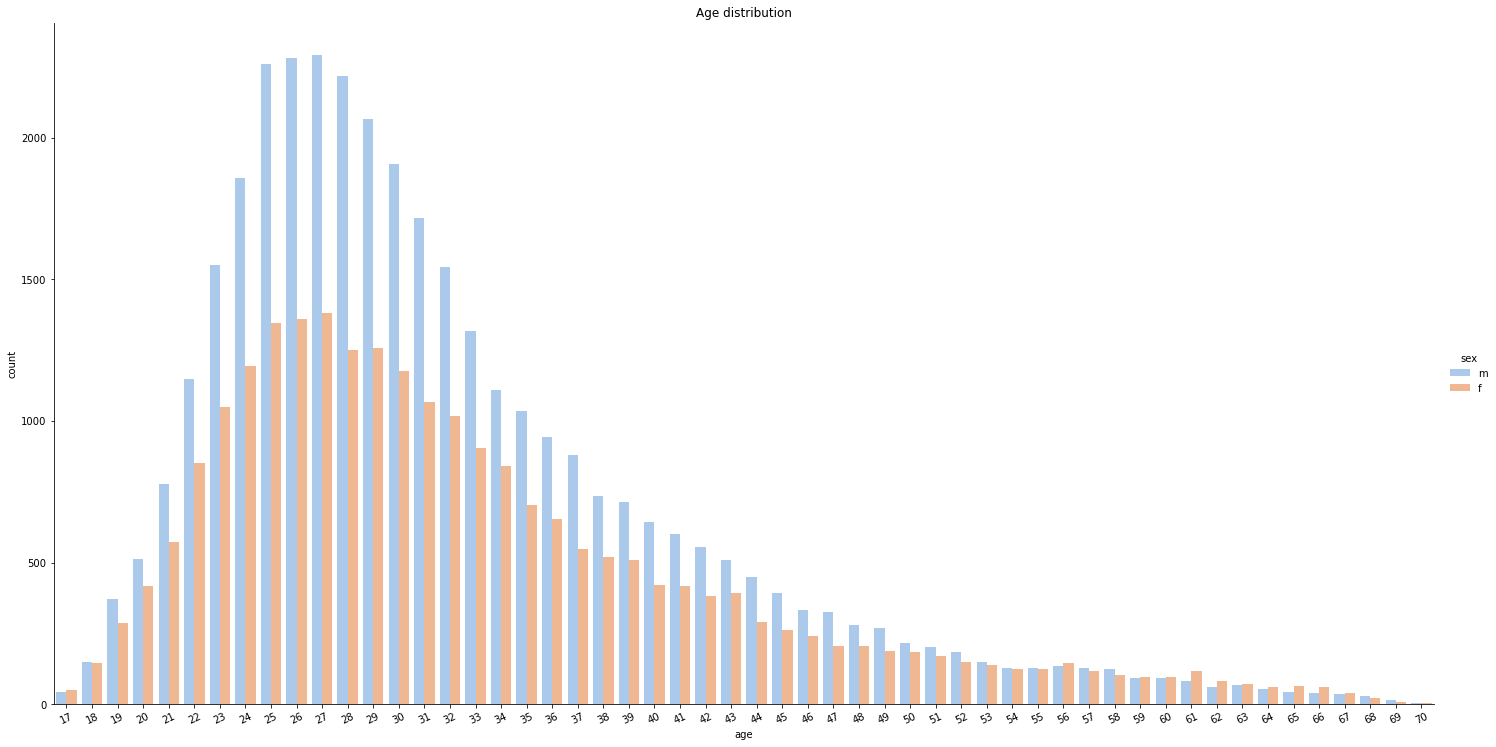

In [12]:
# sns.countplot(y = 'age', data = my_data)
plt.figure(figsize=(20, 7))
sns.catplot(x='age', data = df, kind='count', palette='pastel', hue='sex', 
            height=10, # make the plot 10 units high
            aspect=2)
plt.xticks(rotation = 25)
plt.title('Age distribution')
plt.show()

In [67]:
#Orientation in percentage
def show_percentage(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+p.get_width()/2-0.1
        y = p.get_y()+p.get_height()
        ax.annotate(percentage, (x, y), size=10)

def show_percentage2(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), size=10, va="center")

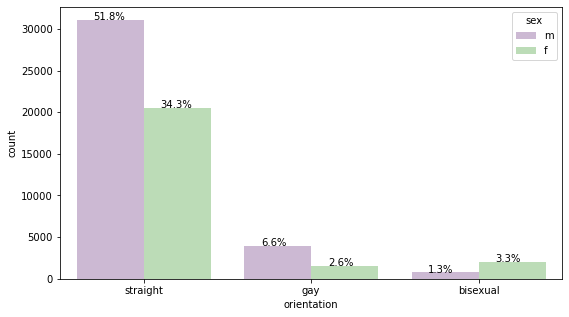

In [14]:
# Orientation (in percentage) of male and females. Represent using a suitable graph
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='orientation', data=df,
hue='sex',
palette='PRGn',
order=df['orientation'].value_counts().iloc[:10].index)
total = float(len(df))
show_percentage(ax, df)
plt.show()

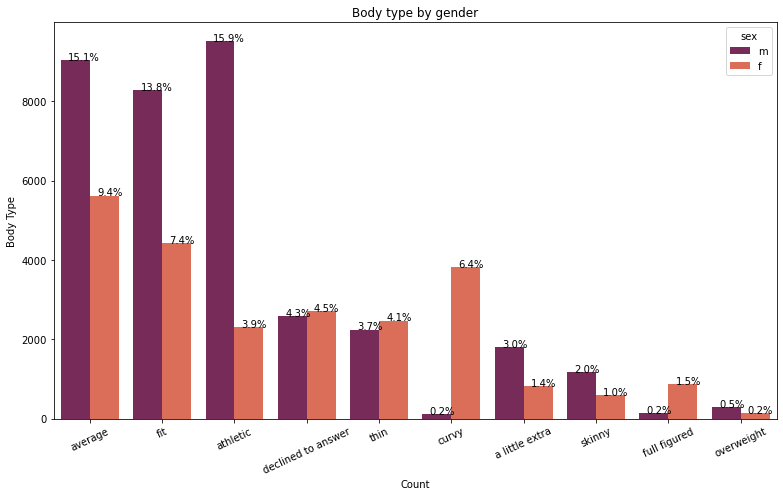

In [15]:
#Body type plot
plt.figure(figsize=(11, 7))
ax = sns.countplot(x='body_type', data=df,
hue='sex',
palette='rocket',
order=df['body_type'].value_counts().iloc[:10].index)
# order= ["athletic", "fit", "curvy", "a little extra", "full figured", "skinny", "thin", "average", "overweight", "declined to answer"])
ax.set_title("Body type by gender")
ax.set(xlabel='Count', ylabel='Body Type')

# body_type_order = ["athletic", "fit", "curvy", "a little extra", "full figured", "skinny", "thin", "average", "overweight", "declined to answer"]


show_percentage(ax, df)
plt.xticks(rotation = 25)
plt.tight_layout()
plt.show()

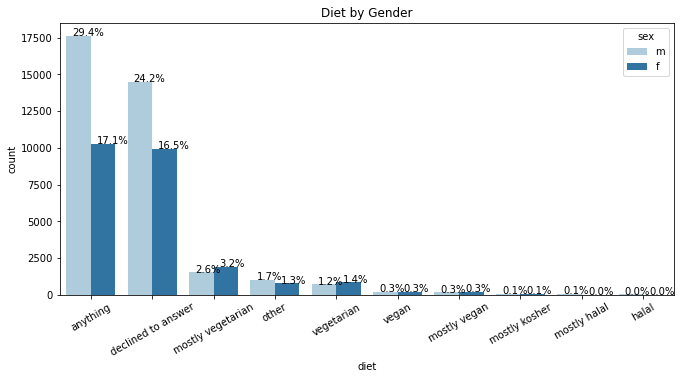

In [77]:
#Different diets by gender. Represent using suitable graph
plt.figure(figsize=(11, 5))
ax = sns.countplot(x='diet', data=df,
hue='sex', palette='Paired',
order = df['diet'].value_counts().iloc[:10].index)
plt.xticks(rotation = 30)
ax.set_title("Diet by Gender")
show_percentage(ax, df)

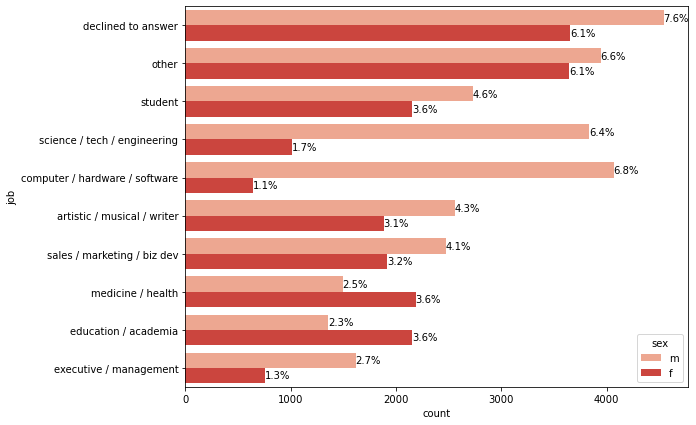

In [76]:
# Compare jobs of males and females. Represent using suitable graphs
plt.figure(figsize=(9, 7))
ax = sns.countplot(y='job', data=df,
hue='sex', palette='Reds',
order = df['job'].value_counts().iloc[:10].index)
show_percentage2(ax, df)
plt.show()

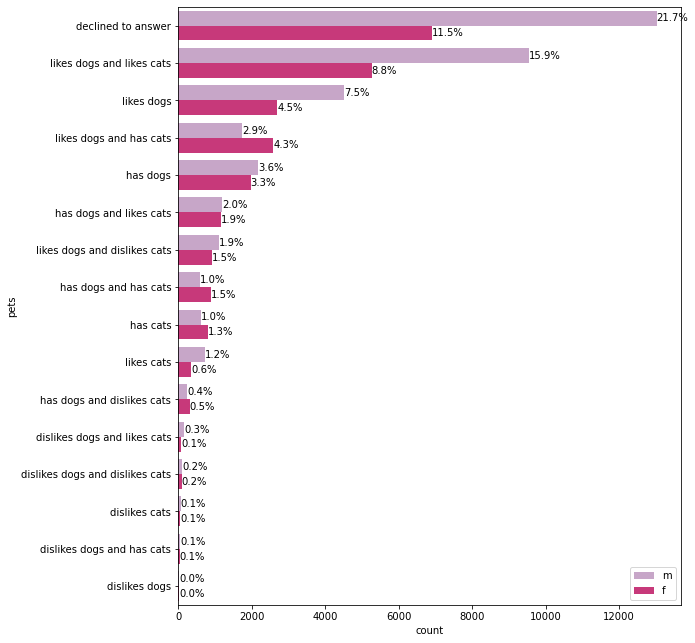

In [75]:
#Compare pets of different gender. Represent using suitable graphs
plt.figure(figsize=(9, 11))
ax = sns.countplot(y = 'pets', data=df,
hue='sex', palette='PuRd',
order=df['pets'].value_counts().iloc[:].index)
show_percentage2(ax, df)
plt.legend(loc="lower right")
plt.show()

In [19]:
list(df.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'height',
 'income',
 'job',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [31]:
print("number of catagories : ",df.sign.nunique())

number of catagories :  19


In [35]:
print("Star Signs : ",df.sign.unique())

Star Signs :  ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' 'declined to answer' 'aries' 'libra' 'scorpio' 'capricorn']


In [22]:
df.sign

0                                    gemini
1                                    cancer
2              pisces but it doesn't matter
3                                    pisces
4                                  aquarius
                        ...                
59941    cancer and it's fun to think about
59942             leo but it doesn't matter
59943     sagittarius but it doesn't matter
59944       leo and it's fun to think about
59945    gemini and it's fun to think about
Name: sign, Length: 59944, dtype: object

In [23]:
df.sign.str.split()

0                                          [gemini]
1                                          [cancer]
2                [pisces, but, it, doesn't, matter]
3                                          [pisces]
4                                        [aquarius]
                            ...                    
59941    [cancer, and, it's, fun, to, think, about]
59942               [leo, but, it, doesn't, matter]
59943       [sagittarius, but, it, doesn't, matter]
59944       [leo, and, it's, fun, to, think, about]
59945    [gemini, and, it's, fun, to, think, about]
Name: sign, Length: 59944, dtype: object

In [24]:
df['signcleaned'] = df.sign.str.split().str.get(0)

In [25]:
df['signcleaned'].tail()

59941         cancer
59942            leo
59943    sagittarius
59944            leo
59945         gemini
Name: signcleaned, dtype: object

In [26]:
print("catogries : ",  list(df.signcleaned.unique()))

catogries :  ['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'virgo', 'sagittarius', 'leo', 'declined', 'aries', 'libra', 'scorpio', 'capricorn']


In [27]:
df.signcleaned.value_counts()

declined       11055
leo             4374
gemini          4310
libra           4207
cancer          4206
virgo           4141
taurus          4140
scorpio         4134
aries           3989
pisces          3946
sagittarius     3942
aquarius        3927
capricorn       3573
Name: signcleaned, dtype: int64

[Text(0.5, 1.0, 'Total Count of Sexes')]

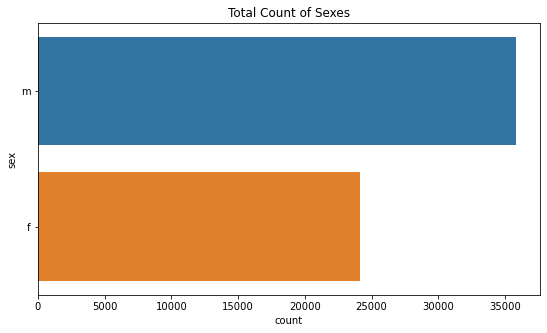

In [83]:
#Males and females in Data
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y="sex").set(title="Total Count of Sexes")



[Text(0.5, 1.0, 'Body Types by Sex')]

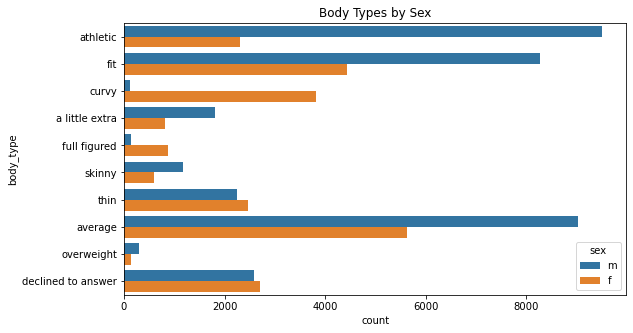

In [88]:
#body type by Gender
#Males and females in Data
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y="body_type", hue = "sex",
order= ["athletic", "fit", "curvy", "a little extra", "full figured", "skinny", "thin", "average", "overweight", "declined to answer"]).set(title="Body Types by Sex")

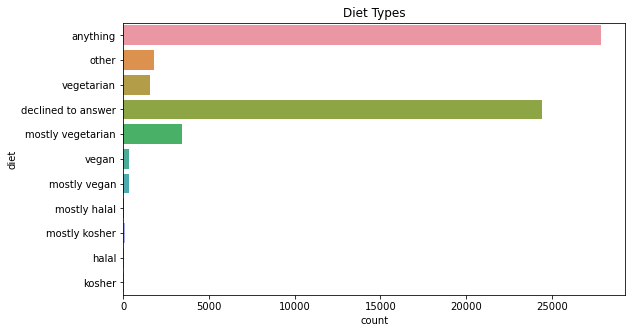

In [89]:
#chart of the dietary information for users
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y="diet").set(title="Diet Types");

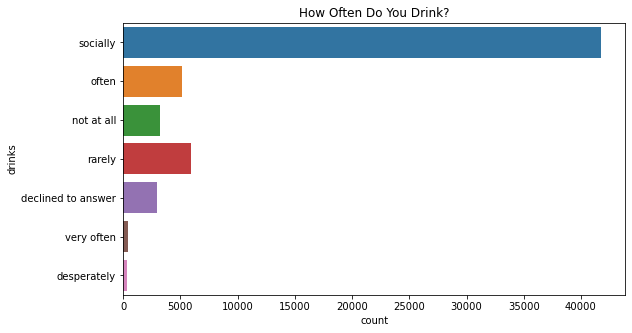

In [91]:
#plot shows that the majority of the users drink "socially", then "rarely" and "often"
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y="drinks").set(title="How Often Do You Drink?");

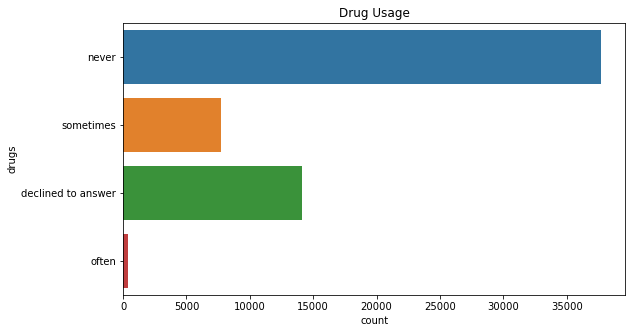

In [93]:
#Drugs users
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y="drugs").set(title="Drug Usage");

[Text(0.5, 1.0, 'Education Background')]

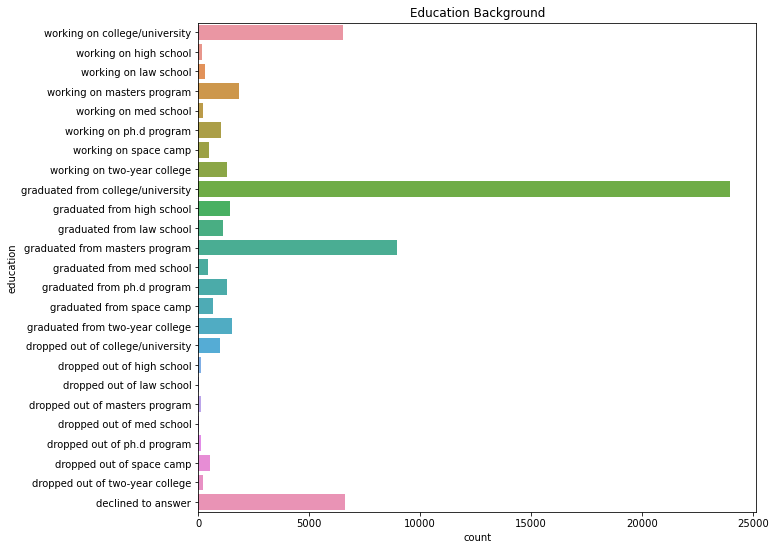

In [111]:
#Education level
plt.figure(figsize=(10,9))

sns.countplot(data=df, y="education",
order=['working on college/university', 'working on high school', 'working on law school', 'working on masters program', 'working on med school', 'working on ph.d program', 'working on space camp', 'working on two-year college',
        'graduated from college/university', 'graduated from high school', 'graduated from law school', 'graduated from masters program', 'graduated from med school', 'graduated from ph.d program', 'graduated from space camp', 'graduated from two-year college',
        'dropped out of college/university', 'dropped out of high school', 'dropped out of law school', 'dropped out of masters program', 'dropped out of med school', 'dropped out of ph.d program', 'dropped out of space camp', 'dropped out of two-year college',
        'declined to answer']).set(title="Education Background")

In [108]:
tbs=df.education.unique()
print(sorted(df['education'].unique()))

['declined to answer', 'dropped out of college/university', 'dropped out of high school', 'dropped out of law school', 'dropped out of masters program', 'dropped out of med school', 'dropped out of ph.d program', 'dropped out of space camp', 'dropped out of two-year college', 'graduated from college/university', 'graduated from high school', 'graduated from law school', 'graduated from masters program', 'graduated from med school', 'graduated from ph.d program', 'graduated from space camp', 'graduated from two-year college', 'working on college/university', 'working on high school', 'working on law school', 'working on masters program', 'working on med school', 'working on ph.d program', 'working on space camp', 'working on two-year college']


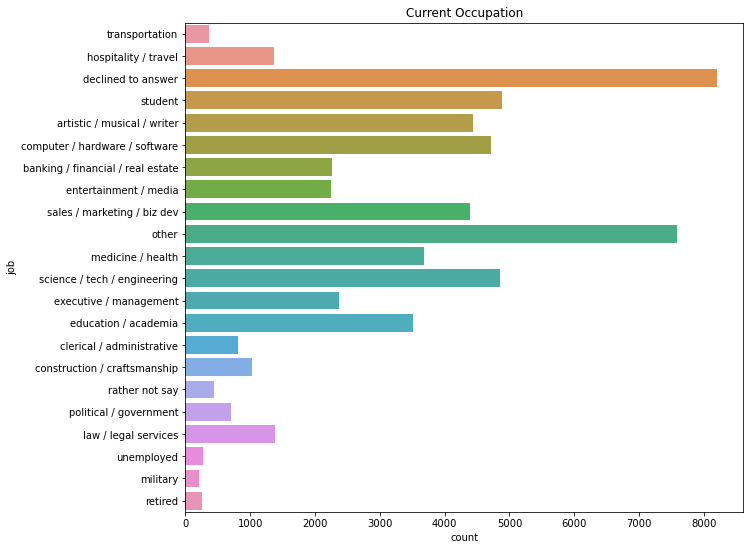

In [113]:
#Jobs(Most users don't fit into the categories provided)
plt.figure(figsize=(10,9))
sns.countplot(data=df, y="job").set(title="Current Occupation");

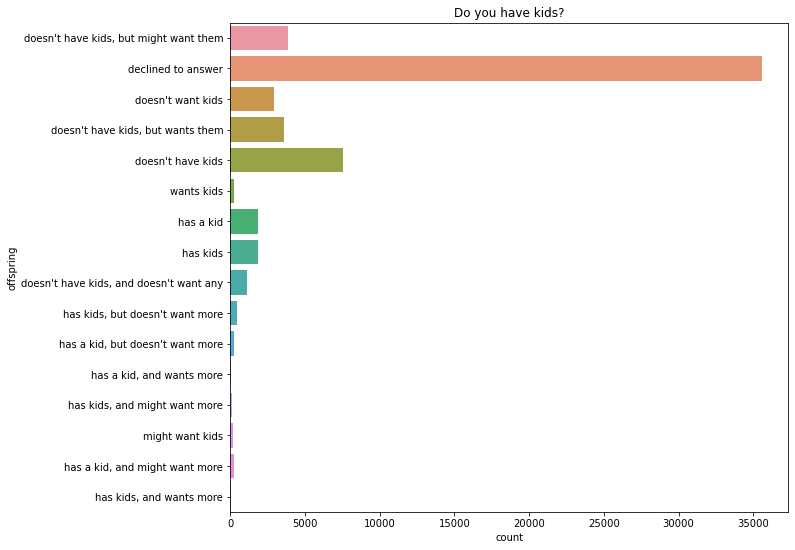

In [115]:
#users with kids
plt.figure(figsize=(10,9))
sns.countplot(data=df, y="offspring").set(title="Do you have kids?");

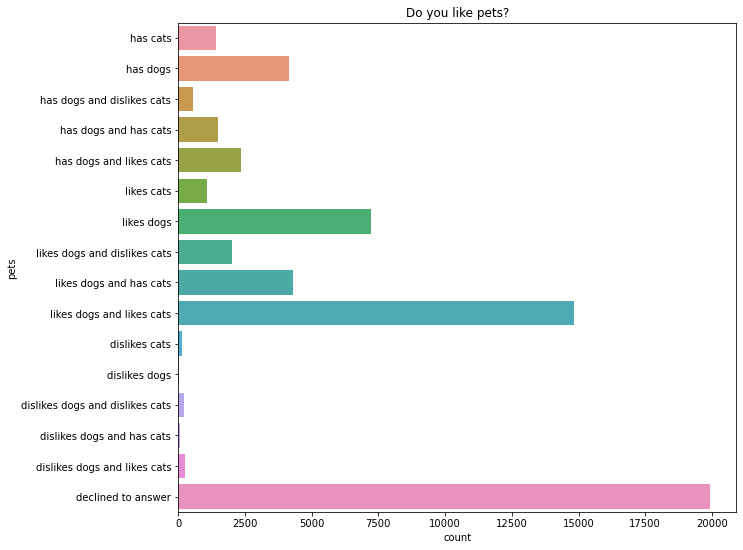

In [118]:
#Pets
plt.figure(figsize=(10,9))
sns.countplot(data=df, y="pets",
order=['has cats', 'has dogs', 'has dogs and dislikes cats', 'has dogs and has cats', 'has dogs and likes cats', 'likes cats', 'likes dogs', 'likes dogs and dislikes cats', 'likes dogs and has cats', 'likes dogs and likes cats',
'dislikes cats', 'dislikes dogs', 'dislikes dogs and dislikes cats', 'dislikes dogs and has cats', 'dislikes dogs and likes cats',
'declined to answer']).set(title="Do you like pets?");

In [117]:
print(sorted(df['pets'].unique()))

['declined to answer', 'dislikes cats', 'dislikes dogs', 'dislikes dogs and dislikes cats', 'dislikes dogs and has cats', 'dislikes dogs and likes cats', 'has cats', 'has dogs', 'has dogs and dislikes cats', 'has dogs and has cats', 'has dogs and likes cats', 'likes cats', 'likes dogs', 'likes dogs and dislikes cats', 'likes dogs and has cats', 'likes dogs and likes cats']


[Text(0.5, 1.0, "What's your Religion?")]

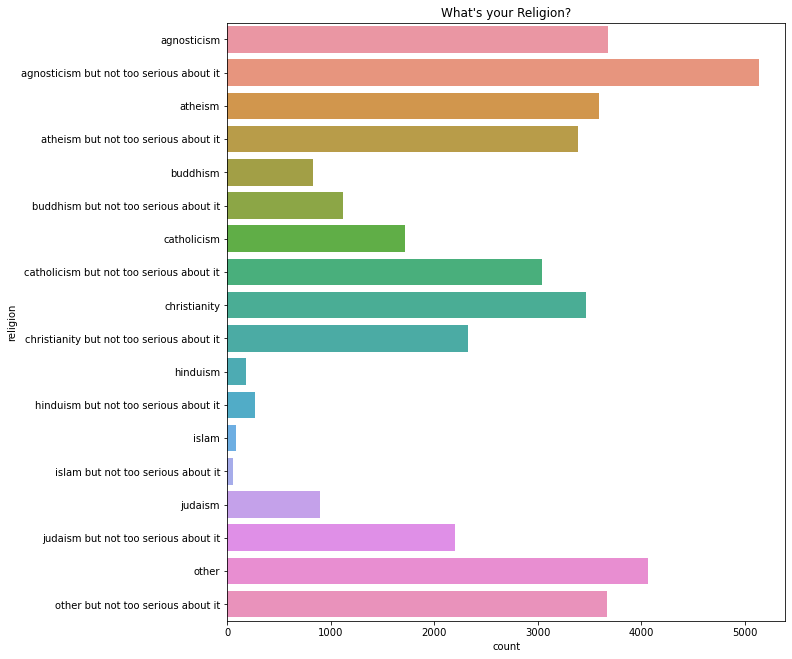

In [119]:
#Religion(Religion was similar to sign where there are a lot of qualifiers)
plt.figure(figsize=(10,11))
sns.countplot(data=df, y="religion",
order=['agnosticism','agnosticism but not too serious about it',
        'atheism','atheism but not too serious about it',
        'buddhism','buddhism but not too serious about it',
        'catholicism','catholicism but not too serious about it',
        'christianity','christianity but not too serious about it',
        'hinduism','hinduism but not too serious about it',
        'islam','islam but not too serious about it',
        'judaism','judaism but not too serious about it',
        'other','other but not too serious about it']).set(title="What's your Religion?")

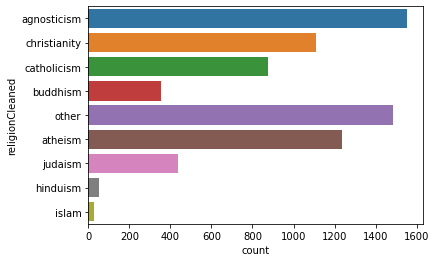

In [142]:
#religion was cleaned to take the first word and distilled down to 9 groups
df['religionCleaned'] = df.religion.str.split().str.get(0)
sns.countplot(data=df, y="religionCleaned");

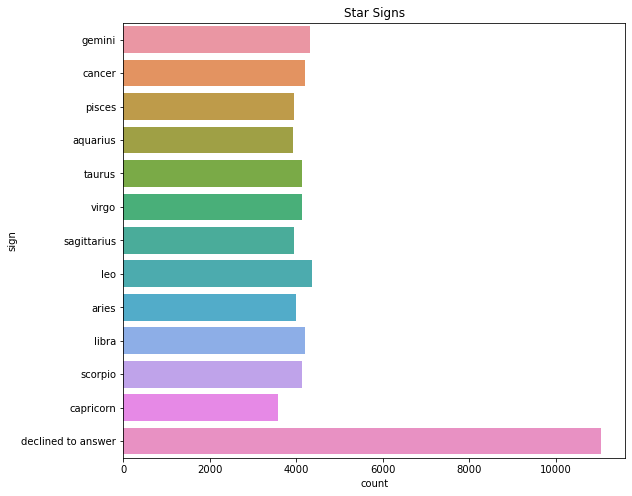

In [120]:
#Signs
plt.figure(figsize=(9,8))
sns.countplot(data=df, y="sign",
order=['gemini','cancer','pisces','aquarius','taurus','virgo','sagittarius','leo','aries','libra','scorpio','capricorn','declined to answer']).set(title="Star Signs");

[Text(0.5, 1.0, 'Do You Smoke?')]

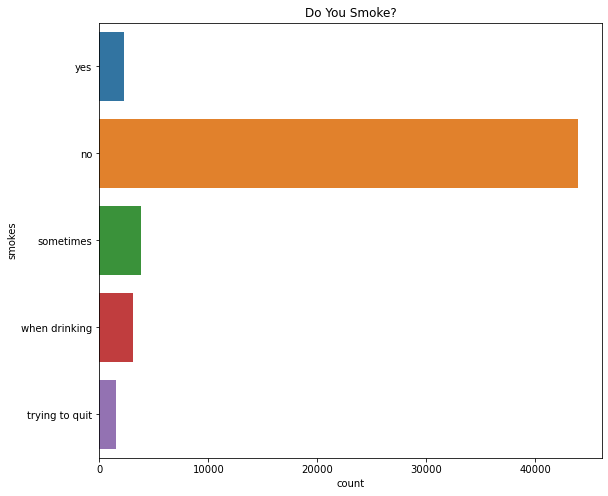

In [122]:
#Smoking
plt.figure(figsize=(9,8))
sns.countplot(data=df, y="smokes",order=['yes','no','sometimes','when drinking','trying to quit']).set(title="Do You Smoke?")


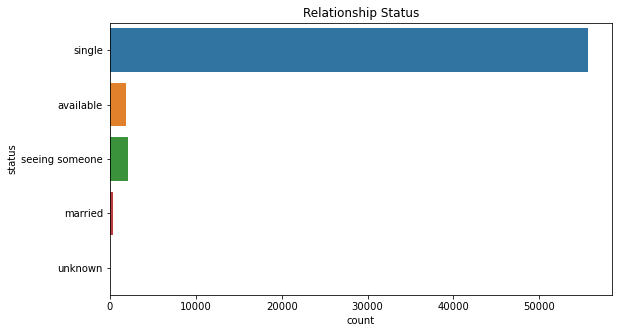

In [128]:
#Status
plt.figure(figsize=(9,5))
sns.countplot(data=df, y="status").set(title="Relationship Status");

In [53]:
df.to_csv('Ok_cupid_cleaned_data.csv',index=False)